# A ML based Quantitative Credit Scoring Model

Team: Hongfei Ge, Sijie Hou, Shuwen Pang

In [22]:
# import modules here
import pandas as pd
import numpy as np
import seaborn as sns

In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clarence/anaconda3/lib/python3.7/site-packa

## 1. Variable Mapping 

In [2]:
data = pd.read_table("./data/Credit_data_RSM6305.txt",sep=' ')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
1,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1
2,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,NaN,A201,2
3,A14,12.0,A34,A46,2096.0,NaN,A74,2.0,A93,A101,...,A121,49.0,A143,NaN,1.0,A172,2.0,A191,A201,1
4,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1
5,A11,24.0,A33,A40,4870.0,A61,A73,3.0,NaN,A101,...,A124,53.0,A143,A153,2.0,A173,NaN,A191,A201,2


<AxesSubplot:>

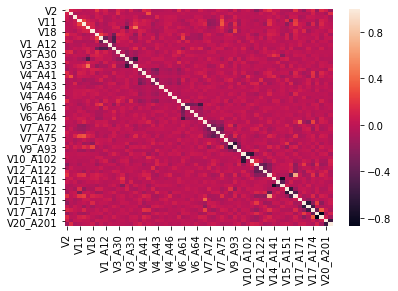

In [3]:
sns.heatmap(pd.get_dummies(data).corr())

In [16]:
pd.get_dummies(data)

,V2,V5,V8,V11,V13,V16,V18,V21,V1_A11,V1_A12,...,V15_A152,V15_A153,V17_A171,V17_A172,V17_A173,V17_A174,V19_A191,V19_A192,V20_A201,V20_A202
1,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1,1,0,...,1,0,0,0,1,0,0,1,1,0
2,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,2,0,1,...,1,0,0,0,1,0,0,0,1,0
3,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
5,24.0,4870.0,3.0,4.0,53.0,2.0,NaN,2,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,12.0,1736.0,3.0,NaN,31.0,1.0,1.0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
997,NaN,3857.0,4.0,4.0,NaN,1.0,1.0,1,1,0,...,1,0,0,0,0,1,0,1,1,0
998,12.0,804.0,4.0,4.0,38.0,1.0,1.0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
999,45.0,1845.0,4.0,4.0,23.0,1.0,1.0,2,1,0,...,0,1,0,0,1,0,0,1,1,0


In [13]:
data['V5'].value_counts()

1478.0    3
1262.0    3
1258.0    3
1393.0    3
1409.0    2
         ..
1882.0    1
1076.0    1
806.0     1
931.0     1
2096.0    1
Name: V5, Length: 899, dtype: int64

## 2. Exploratory Data Analysis &Wranging

In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clarence/anaconda3/lib/python3.7/site-packa

array([[<AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V5'}>,
        <AxesSubplot:title={'center':'V8'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V16'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V21'}>, <AxesSubplot:>]],
      dtype=object)

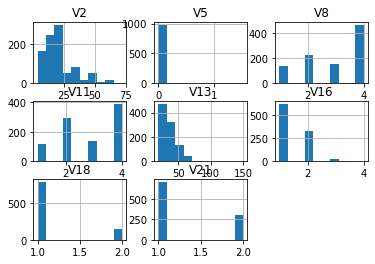

In [12]:
data.hist()

## 3. Variable Selection and Transformation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      969 non-null    object 
 1   V2      929 non-null    float64
 2   V3      935 non-null    object 
 3   V4      951 non-null    object 
 4   V5      973 non-null    float64
 5   V6      977 non-null    object 
 6   V7      958 non-null    object 
 7   V8      982 non-null    float64
 8   V9      926 non-null    object 
 9   V10     982 non-null    object 
 10  V11     940 non-null    float64
 11  V12     927 non-null    object 
 12  V13     978 non-null    float64
 13  V14     969 non-null    object 
 14  V15     938 non-null    object 
 15  V16     984 non-null    float64
 16  V17     994 non-null    object 
 17  V18     934 non-null    float64
 18  V19     934 non-null    object 
 19  V20     937 non-null    object 
 20  V21     1000 non-null   int64  
dtypes: float64(7), int64(1), object(13)
m

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from myLogisticRegression import LogisticRegression,stepwiseFwdLR

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
# standard dataset for code review
data=load_breast_cancer()
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data.data,data.target,test_size=0.33,random_state=0)

In [5]:
# nomalize data for LR and sFwdLR
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Xtrain)
Xtrain_trans=scaler.transform(Xtrain)
Xtest_trans=scaler.transform(Xtest)

In [12]:
# some utilities
def lr_statistics(lrModel,nSample,featureId=None):
    ts=np.sqrt(nSample)*lrModel.beta/np.sqrt(np.diag(np.linalg.inv(lrModel.hessian)))
    pv=[ 2*(1-t.cdf(abs(tv),nSample-1))  for tv in ts ]
    summary=pd.DataFrame({'coefficient':lrModel.beta,
                          't-statistics':ts,
                          'p-value':pv})
    if lrModel.fitIntercept:
        if not featureId:
            summary.index=['beta_'+str(i) for i in range(len(lrModel.beta))]
        else:
            summary.index=['beta_0']+['beta_'+str(i) for i in featureId]
    else:
        if not featureId:
            summary.index=['beta_'+str(i+1) for i in range(len(lrModel.beta))]
        else:
            summary.index=['beta_'+str(i) for i in featureId]
    
    summary['significance_0.05']=summary['p-value']<0.05
    
    return summary

def roc_analysis(trueLabel,proba):
    auc=roc_auc_score(trueLabel,proba)
    fpr,tpr,threshold=roc_curve(trueLabel,proba)
    bestCutOff=threshold[np.argsort(np.abs(tpr-fpr))[-1]]
    
    print('AUC:',auc)
    print('best cut off value:',bestCutOff)
    plt.plot(fpr,tpr)
    return bestCutOff

### 4.1 Logistic Regression

In [7]:
lr=LogisticRegression()
lr.train(Xtrain_trans,Ytrain)

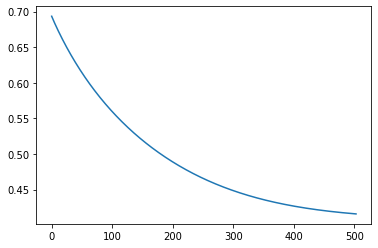

In [8]:
lr.print_loss_curve()

AUC: 0.9909994155464641
best cut off value: 0.515942475077848


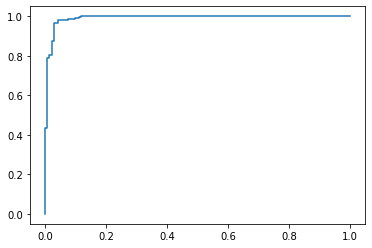

In [13]:
lr_proba_train=lr.predict(Xtrain_trans)
lr_cutoff=roc_analysis(Ytrain,lr_proba_train)

In [14]:
lr_statistics(lr,Xtrain_trans.shape[0])

,coefficient,t-statistics,p-value,significance_0.05
beta_0,0.073705,11.594705,0.000000,True
beta_1,-0.093537,-2.249180,0.025073,True
beta_2,-0.062262,-3.586898,0.000378,True
beta_3,-0.093975,-2.207097,0.027904,True
beta_4,-0.088226,-2.185650,0.029451,True
beta_5,-0.044880,-2.814646,0.005137,True
beta_6,-0.061392,-2.283799,0.022934,True
beta_7,-0.081214,-2.505108,0.012659,True
beta_8,-0.098036,-3.105789,0.002040,True
beta_9,-0.038940,-3.353771,0.000877,True


### 4.2 Stepwise Forward Logistic Regression

In [15]:
sFwdLR=stepwiseFwdLR()
sFwdLR_fid=sFwdLR.train(Xtrain_trans,Ytrain)

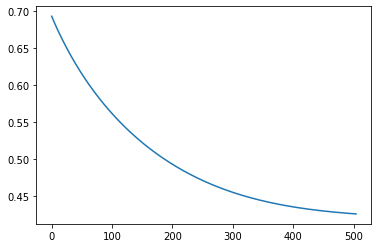

In [16]:
sFwdLR.print_loss_curve()

AUC: 0.9746639392168323
best cut off value: 0.5113143936501406


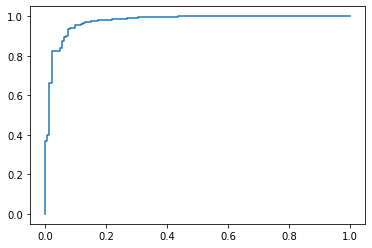

In [17]:
sFwdLR_proba_train=sFwdLR.predict(Xtrain_trans[:,sFwdLR_fid[1:]])
sFwdLR_cutoff=roc_analysis(Ytrain,sFwdLR_proba_train)

In [18]:
lr_statistics(sFwdLR,Xtrain_trans.shape[0],sFwdLR_fid)

,coefficient,t-statistics,p-value,significance_0.05
beta_0,0.075412,12.156314,0.000000e+00,True
beta_28,-0.113921,-5.082279,5.862666e-07,True
beta_23,-0.107463,-2.650140,8.381960e-03,True
beta_8,-0.106432,-3.727503,2.227894e-04,True
beta_21,-0.108371,-2.636548,8.718864e-03,True
beta_27,-0.093107,-4.005238,7.453988e-05,True
beta_3,-0.098481,-2.348693,1.935106e-02,True
beta_24,-0.098347,-2.849543,4.616626e-03,True
beta_7,-0.089779,-3.354430,8.753356e-04,True
beta_1,-0.097621,-2.382888,1.766823e-02,True


### 4.3 Decision Tree

In [19]:
clf=DecisionTreeClassifier(random_state=0)
path=clf.cost_complexity_pruning_path(Xtrain,Ytrain)
cv_score=[]

for alpha in path.ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    score=cross_val_score(clf,Xtrain,Ytrain,cv=5,scoring='accuracy')
    cv_score.append(score.tolist())

best_alpha=path.ccp_alphas[np.mean(cv_score,axis=1).argmin()]

dt=DecisionTreeClassifier(random_state=0,ccp_alpha=best_alpha)
dt.fit(Xtrain,Ytrain)

DecisionTreeClassifier(ccp_alpha=0.3401255159574941, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

AUC: 0.5
best cut off value: 0.6194225721784777


0.6194225721784777

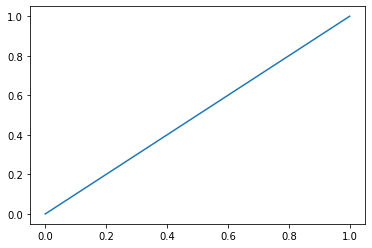

In [20]:
_=roc_analysis(Ytrain,dt.predict_proba(Xtrain)[:,1])

### 4.4 Random Forest

In [21]:
paramGrid={'n_estimators':np.arange(200,2100,100).tolist(),
           'max_features':np.arange(2,11,1).tolist()}

rf=RandomForestClassifier(random_state=0)
gs=GridSearchCV(rf,param_grid=paramGrid,cv=5,scoring='accuracy')
gs.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [22]:
gsResult=pd.DataFrame(gs.cv_results_)
gsResult[gsResult['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.230023,0.005541,0.013833,0.000330,3,200,"{'max_features': 3, 'n_estimators': 200}",0.935065,0.934211,0.986842,0.934211,0.986842,0.955434,0.025646,1
21,0.460142,0.008965,0.028010,0.000820,3,400,"{'max_features': 3, 'n_estimators': 400}",0.935065,0.934211,0.986842,0.934211,0.986842,0.955434,0.025646,1
34,2.015618,0.050354,0.123661,0.007076,3,1700,"{'max_features': 3, 'n_estimators': 1700}",0.935065,0.934211,0.986842,0.934211,0.986842,0.955434,0.025646,1
35,2.113655,0.041789,0.121934,0.001996,3,1800,"{'max_features': 3, 'n_estimators': 1800}",0.935065,0.934211,0.986842,0.934211,0.986842,0.955434,0.025646,1
36,2.226601,0.062133,0.129930,0.003047,3,1900,"{'max_features': 3, 'n_estimators': 1900}",0.935065,0.934211,0.986842,0.934211,0.986842,0.955434,0.025646,1


In [23]:
bestHyperParam=gs.cv_results_['params'][gs.cv_results_['rank_test_score'].argmin()]
rf=RandomForestClassifier(**bestHyperParam,random_state=0)
rf.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

AUC: 1.0
best cut off value: 0.71


0.71

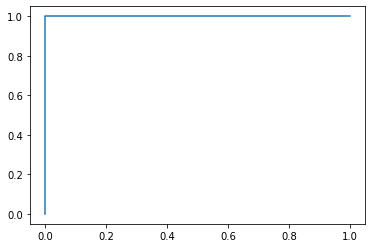

In [24]:
_=roc_analysis(Ytrain,rf.predict_proba(Xtrain)[:,1])

In [25]:
featureName=list(data.feature_names)
featureImp=list(zip(featureName,rf.feature_importances_))
featureImp=np.array(sorted(featureImp,key=lambda x:x[1],reverse=True))

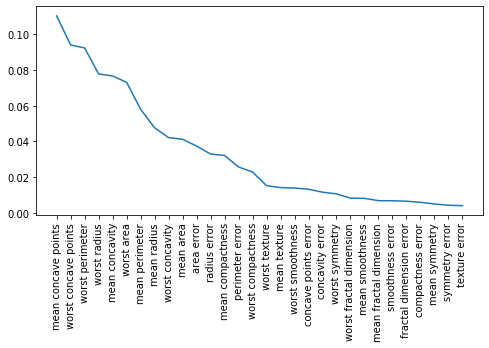

In [26]:
plt.figure(figsize=(8,5))
plt.plot(featureImp[:,1].astype(float),label='feature importance')
plt.xticks(np.arange(len(featureImp)),featureImp[:,0],rotation=90)
plt.subplots_adjust(bottom=0.3)

data['V21'].value_counts()

### 5.1 Out-of-sample prediction

In [27]:
lr_proba_test=lr.predict(Xtest_trans)
sFwdLR_proba_test=sFwdLR.predict(Xtest_trans[:,sFwdLR_fid[1:]])
dt_proba_test=dt.predict_proba(Xtest)
rf_proba_test=rf.predict_proba(Xtest)
result=pd.DataFrame({'lr_proba':lr_proba_test,
                     'sFwdLR_proba':sFwdLR_proba_test,
                     'dt_proba':dt_proba_test[:,1],
                     'rf_proba':rf_proba_test[:,1]})
result['lr_pred']=(result['lr_proba']>lr_cutoff).astype(int)
result['sFwdLR_pred']=(result['sFwdLR_proba']>sFwdLR_cutoff).astype(int)
result['dt_pred']=dt.predict(Xtest)
result['rf_pred']=rf.predict(Xtest)
result['true_label']=Ytest

In [28]:
result

,lr_proba,sFwdLR_proba,dt_proba,rf_proba,lr_pred,sFwdLR_pred,dt_pred,rf_pred,true_label
0,0.335968,0.289685,0.619423,0.050,0,0,1,0,0
1,0.682591,0.630938,0.619423,0.935,1,1,1,1,1
2,0.746016,0.786272,0.619423,1.000,1,1,1,1,1
3,0.694164,0.733027,0.619423,0.920,1,1,1,1,1
4,0.790325,0.758357,0.619423,0.940,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
183,0.503688,0.499211,0.619423,0.585,0,0,1,1,0
184,0.756796,0.740476,0.619423,0.985,1,1,1,1,1
185,0.796716,0.735001,0.619423,0.995,1,1,1,1,1
186,0.602013,0.672638,0.619423,0.835,1,1,1,1,1


### 5.2 Brier Score

In [29]:
def BrierScore(proba,true):
    return ((proba-true)**2).mean()

In [30]:
print('Logistic Regression Brier Score:',BrierScore(lr_proba_test,Ytest))
print('Stepwise Forward Logistic Regression Brier Score:',BrierScore(sFwdLR_proba_test,Ytest))
print('Decision Tree Brier Score:',BrierScore(dt_proba_test[:,1],Ytest))
print('Random Forest Brier Score:',BrierScore(rf_proba_test[:,1],Ytest))

Logistic Regression Brier Score: 0.09669570451899709
Stepwise Forward Logistic Regression Brier Score: 0.1236884544720745
Decision Tree Brier Score: 0.22995952256679925
Random Forest Brier Score: 0.030988031914893615


### 5.3 Hosmer Lemeshow Test

In [31]:
def HLtest(proba,true,g=10):
    from sklearn.model_selection import KFold
    from scipy.stats import chi2
    kf=KFold(n_splits=g)
    groupProba=[]
    groupTrue=[]
    for _,outIndex in kf.split(proba):
        groupProba.append(proba[outIndex])
        groupTrue.append(true[outIndex])
    
    groupProba=np.array([ proba.mean() for proba in groupProba ])
    groupTrue=np.array([ [true.sum(),len(true)-true.sum(),len(true)] for true in groupTrue ])
    expPos=groupProba*groupTrue[:,2]
    expNeg=(1-groupProba)*groupTrue[:,2]
    HL=((groupTrue[:,0]-expPos)**2/expPos + (groupTrue[:,1]-expNeg)**2/expNeg).sum()
    p=1-chi2.cdf(HL,g-2)
    
    return HL,p

In [32]:
for method,proba in zip(['Logistic Regression','Stepwise Forward Logistic Regression','Decision Tree','Random Forest'],
                         [lr_proba_test,sFwdLR_proba_test,dt_proba_test[:,1],rf_proba_test[:,1]]):
    HL,p=HLtest(proba,Ytest)
    print(method+':')
    print('HL statistics='+str(HL),'p value='+str(p),'significance(0.05):'+str(p<0.05))
    print('-'*20)

Logistic Regression:
HL statistics=11.533942871439875 p value=0.1732406252702765 significance(0.05):False
--------------------
Stepwise Forward Logistic Regression:
HL statistics=14.950649916565494 p value=0.06011217447076245 significance(0.05):False
--------------------
Decision Tree:
HL statistics=13.364479067335202 p value=0.09990921176623191 significance(0.05):False
--------------------
Random Forest:
HL statistics=1.8204156007556207 p value=0.9860310119949901 significance(0.05):False
--------------------


### 5.4 ROC and AUC

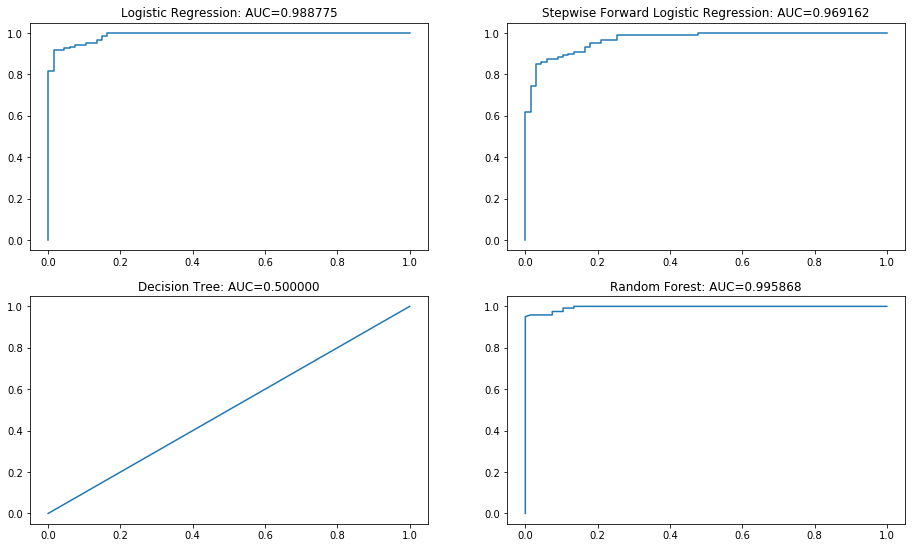

In [37]:
plt.figure(figsize=(18,12))

for i,item in enumerate(list(zip(['Logistic Regression','Stepwise Forward Logistic Regression',
                                  'Decision Tree','Random Forest'],
                                  [lr_proba_test,sFwdLR_proba_test,dt_proba_test[:,1],rf_proba_test[:,1]]))):

    plt.subplot(2,2,i+1)
    fpr,tpr,_=roc_curve(Ytest,item[1])
    plt.plot(fpr,tpr)
    plt.title('{0}: AUC={1:.6f}'.format(item[0],roc_auc_score(Ytest,item[1])))
    plt.subplots_adjust(bottom=0.3,right=0.8)

### 5.5 Final model selection

In [6]:
data['target'] = data['V21'].apply(lambda x : 1 if x == 2 else 0)  # Convert to numeric
data = data.drop('V21',axis=1)

In [7]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,target
1,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,0
2,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,NaN,A201,1
3,A14,12.0,A34,A46,2096.0,NaN,A74,2.0,A93,A101,...,A121,49.0,A143,NaN,1.0,A172,2.0,A191,A201,0
4,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,0
5,A11,24.0,A33,A40,4870.0,A61,A73,3.0,NaN,A101,...,A124,53.0,A143,A153,2.0,A173,NaN,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,A14,12.0,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1.0,A191,A201,0
997,A11,NaN,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,NaN,A143,A152,1.0,A174,1.0,A192,A201,0
998,A14,12.0,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201,0
999,A11,45.0,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1.0,A192,A201,1


### 3.1 Spliting training&testing set

Before moving to the estimation phase, it is important to not use the full data for estimation. Conduct a 70:30 cross validation, which means randomly sample 70% of the data as training set and keep the rest of 30% as test set. 

In [8]:
from sklearn.model_selection import train_test_split

X = data[data.columns.difference(['target'])]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [9]:
y_train.value_counts()

0    491
1    209
Name: target, dtype: int64

In [10]:
y_test.value_counts()

0    209
1     91
Name: target, dtype: int64

### 3.2 Binning and WOE calculation

Perform binning by grouping each of the variables (new features created from the previous section and the existing ones).

**Note:**
 1. We treated NaN as a attribute under each variable binning.
 2. Binning function and woe calculation are implemented under `./src/woe.py`
 

In [11]:
from src import woe
final_iv, IV = woe.data_vars(X_train,y_train)
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,V1,A11,A11,181,87.0,0.480663,94.0,0.519337,0.416268,0.191446,0.776723,0.590031
1,V1,A12,A12,189,73.0,0.386243,116.0,0.613757,0.349282,0.236253,0.390979,0.590031
2,V1,A13,A13,41,8.0,0.195122,33.0,0.804878,0.038278,0.067210,-0.562956,0.590031
3,V1,A14,A14,267,33.0,0.123596,234.0,0.876404,0.157895,0.476578,-1.104704,0.590031
4,V1,NaN,NaN,22,8.0,0.363636,14.0,0.636364,0.038278,0.028513,0.294494,0.590031
...,...,...,...,...,...,...,...,...,...,...,...,...
87,V9,A91,A91,28,9.0,0.321429,19.0,0.678571,0.043062,0.038697,0.106895,0.045466
88,V9,A92,A92,208,76.0,0.365385,132.0,0.634615,0.363636,0.268839,0.302041,0.045466
89,V9,A93,A93,355,96.0,0.270423,259.0,0.729577,0.459330,0.527495,-0.138370,0.045466
90,V9,A94,A94,60,16.0,0.266667,44.0,0.733333,0.076555,0.089613,-0.157491,0.045466


In [12]:
# check the detials about woe here
??woe

In [13]:
IV.sort_values('IV')

,VAR_NAME,IV
9,V18,0.001337
2,V11,0.019443
18,V8,0.024541
15,V5,0.034552
10,V19,0.049794
1,V10,0.060289
7,V16,0.069226
5,V14,0.109044
12,V20,0.170341
8,V17,0.176723


### 3.3 WOE trasformation

Drop all the variables with an information value less than 0.02. This way, you can come up with a final set of variables for estimation. 

- Due to the IV values of `V18` and `V11` are lower lower than 0.02, we remove them from our dataset.

In [14]:
transform_vars_list = list((IV[IV.IV>=0.02]).VAR_NAME)
transform_prefix = 'woe_'

In [15]:
X_train_woe = woe.woe_transform(X_train,transform_vars_list,final_iv)

In [16]:
X_train_woe

,woe_V1,woe_V10,woe_V12,woe_V13,woe_V14,woe_V15,woe_V16,woe_V17,woe_V19,woe_V2,woe_V20,woe_V3,woe_V4,woe_V5,woe_V6,woe_V7,woe_V8,woe_V9
542,-1.104704,-0.00088,0.640536,-0.471560,-0.079747,0.713031,-0.174474,-0.033653,-0.143698,-0.110971,0.044891,-0.559583,0.485202,-0.097345,0.251114,-0.422184,0.087535,-0.138370
441,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,0.082631,0.186938,-0.143698,-0.311397,0.044891,0.205813,0.485202,-0.097345,0.251114,-0.422184,0.087535,-0.271901
483,0.776723,-0.00088,0.071351,-0.471560,-0.079747,0.387087,-0.174474,-0.033653,0.302041,0.625268,0.044891,0.205813,-0.130744,0.071618,-1.193583,-0.422184,0.087535,0.302041
423,0.294494,-0.00088,-0.592809,-0.471560,-0.079747,-0.216332,-0.174474,-0.152129,0.055602,-0.311397,0.044891,-0.868657,0.485202,-0.097345,0.251114,-0.103730,-0.089796,-0.138370
779,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,-0.174474,0.186938,-0.143698,0.625268,0.044891,-0.868657,-0.668317,0.071618,-1.193583,-0.422184,0.087535,-0.138370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,-1.104704,-0.00088,0.640536,-0.244502,0.377186,-0.090352,-0.174474,0.186938,-0.143698,-0.126719,0.044891,0.979273,0.485202,0.071618,0.251114,0.671788,-0.089796,-0.138370
271,-1.104704,-0.00088,0.071351,0.151207,-0.079747,-0.216332,0.082631,-0.033653,0.302041,-0.126719,-1.543785,0.205813,0.485202,0.071618,-0.445173,-0.103730,0.087535,-0.138370
861,-1.104704,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,-0.174474,-0.033653,0.055602,-0.110971,0.044891,-0.559583,-0.668317,0.071618,-1.193583,-0.040407,0.087535,-0.138370
436,0.390979,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,0.082631,-0.033653,-0.143698,-0.311397,0.044891,0.205813,-0.579651,-0.097345,-0.445173,-0.040407,-0.089796,-0.157491


### 3.4 Correlation matrix of the of all the variables

<AxesSubplot:>

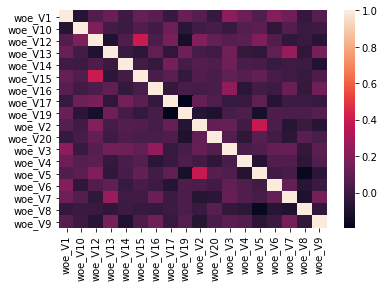

In [23]:
sns.heatmap(X_train_woe.corr())

From the correlation matrix, it shows that most of the variables we selected are independent. Only 2 pairs appears to be correlated:

1. `V2` (Duration) and `V5` (credit amount)

2. `V12` (qualitative) and `V15` (housing)

## 4. Estimation

In [18]:
X_train_woe

,woe_V1,woe_V10,woe_V12,woe_V13,woe_V14,woe_V15,woe_V16,woe_V17,woe_V19,woe_V2,woe_V20,woe_V3,woe_V4,woe_V5,woe_V6,woe_V7,woe_V8,woe_V9
542,-1.104704,-0.00088,0.640536,-0.471560,-0.079747,0.713031,-0.174474,-0.033653,-0.143698,-0.110971,0.044891,-0.559583,0.485202,-0.097345,0.251114,-0.422184,0.087535,-0.138370
441,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,0.082631,0.186938,-0.143698,-0.311397,0.044891,0.205813,0.485202,-0.097345,0.251114,-0.422184,0.087535,-0.271901
483,0.776723,-0.00088,0.071351,-0.471560,-0.079747,0.387087,-0.174474,-0.033653,0.302041,0.625268,0.044891,0.205813,-0.130744,0.071618,-1.193583,-0.422184,0.087535,0.302041
423,0.294494,-0.00088,-0.592809,-0.471560,-0.079747,-0.216332,-0.174474,-0.152129,0.055602,-0.311397,0.044891,-0.868657,0.485202,-0.097345,0.251114,-0.103730,-0.089796,-0.138370
779,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,-0.174474,0.186938,-0.143698,0.625268,0.044891,-0.868657,-0.668317,0.071618,-1.193583,-0.422184,0.087535,-0.138370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,-1.104704,-0.00088,0.640536,-0.244502,0.377186,-0.090352,-0.174474,0.186938,-0.143698,-0.126719,0.044891,0.979273,0.485202,0.071618,0.251114,0.671788,-0.089796,-0.138370
271,-1.104704,-0.00088,0.071351,0.151207,-0.079747,-0.216332,0.082631,-0.033653,0.302041,-0.126719,-1.543785,0.205813,0.485202,0.071618,-0.445173,-0.103730,0.087535,-0.138370
861,-1.104704,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,-0.174474,-0.033653,0.055602,-0.110971,0.044891,-0.559583,-0.668317,0.071618,-1.193583,-0.040407,0.087535,-0.138370
436,0.390979,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,0.082631,-0.033653,-0.143698,-0.311397,0.044891,0.205813,-0.579651,-0.097345,-0.445173,-0.040407,-0.089796,-0.157491


In [19]:
y_train

542    0
441    0
483    0
423    0
779    0
      ..
107    1
271    0
861    0
436    1
103    0
Name: target, Length: 700, dtype: int64

## 5. Performance Validation

In [20]:
# out of sample inputs woe transform
X_test_woe = woe.woe_transform(X_test,transform_vars_list,final_iv)

In [21]:
X_test_woe

,woe_V1,woe_V10,woe_V12,woe_V13,woe_V14,woe_V15,woe_V16,woe_V17,woe_V19,woe_V2,woe_V20,woe_V3,woe_V4,woe_V5,woe_V6,woe_V7,woe_V8,woe_V9
522,0.776723,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,0.082631,-0.033653,0.055602,-0.126719,0.044891,-0.559583,-0.579651,0.071618,0.251114,-0.040407,-0.089796,0.302041
738,0.776723,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,0.082631,-0.152129,-0.143698,-0.126719,0.044891,0.205813,0.485202,0.071618,0.225501,-0.040407,-0.089796,-0.138370
741,0.776723,-0.00088,0.049737,0.151207,0.377186,-0.216332,0.082631,-0.033653,0.055602,-0.110971,0.044891,0.979273,0.485202,-0.097345,0.225501,-0.103730,-0.089796,-0.138370
661,-0.562956,-0.00088,-0.592809,0.431695,-0.079747,0.387087,0.082631,-0.033653,0.055602,-0.311397,0.044891,0.205813,-0.579651,-0.097345,0.251114,-0.040407,-0.089796,-0.157491
412,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.090352,-0.174474,0.186938,-0.143698,0.625268,0.044891,-0.868657,-0.668317,0.071618,0.251114,-0.103730,-0.089796,-0.138370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,-1.104704,-0.00088,0.049737,0.431695,-0.079747,-0.216332,-0.174474,-0.033653,-0.143698,0.625268,0.044891,0.006812,0.394578,0.071618,0.251114,-0.040407,-0.089796,-0.271901
936,0.390979,-0.00088,0.640536,0.151207,0.218121,-0.216332,-0.174474,0.186938,0.055602,0.625268,0.044891,0.006812,-0.579651,0.402125,0.225501,0.338644,0.087535,-0.138370
429,-1.104704,-0.00088,0.049737,0.431695,-0.079747,-0.216332,0.082631,-0.033653,0.055602,-0.311397,0.044891,0.205813,-0.130744,-0.097345,0.251114,-0.422184,-0.089796,-0.138370
8,0.390979,-0.00088,0.049737,-0.244502,-0.079747,0.387087,0.082631,0.186938,-0.143698,0.625268,0.044891,0.205813,-0.668317,0.071618,0.251114,-0.040407,-0.089796,-0.138370


### 5.1 predict out-of-sample default probability for each method

### 5.2 Brier score 
- https://en.wikipedia.org/wiki/Brier_score 

### 5.3 Hosmer – Lemeshow Test

[A good primer](http://thestatsgeek.com/2014/02/16/the-hosmer-lemeshow-goodness-of-fit-test-for-logistic-regression/)

### 5.4 ROC curve, AUC

### 5.5 Final Recommendation